# Worksheet 21

Name:  Liang Han
UID: U86104920

### Topics

- Logistic Regression

## Logistic Regression

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)


# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x: x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y


# CIRCLE
def generate_circle_data():
    # create some space between the classes
    X = np.array(list(filter(
        lambda x: (x[0] - centers[0][0]) ** 2 + (x[1] - centers[0][1]) ** 2 < 1 or (x[0] - centers[0][0]) ** 2 + (
                x[1] - centers[0][1]) ** 2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0]) ** 2 + (x[1] - centers[0][1]) ** 2 >= 1 else 0 for x in X])
    return X, Y


# XOR
def generate_xor_data():
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

In [41]:
X, Y = generate_line_data()

b) Fit a logistic regression model to the data a print out the coefficients.

In [42]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_

array([0.05839469])

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

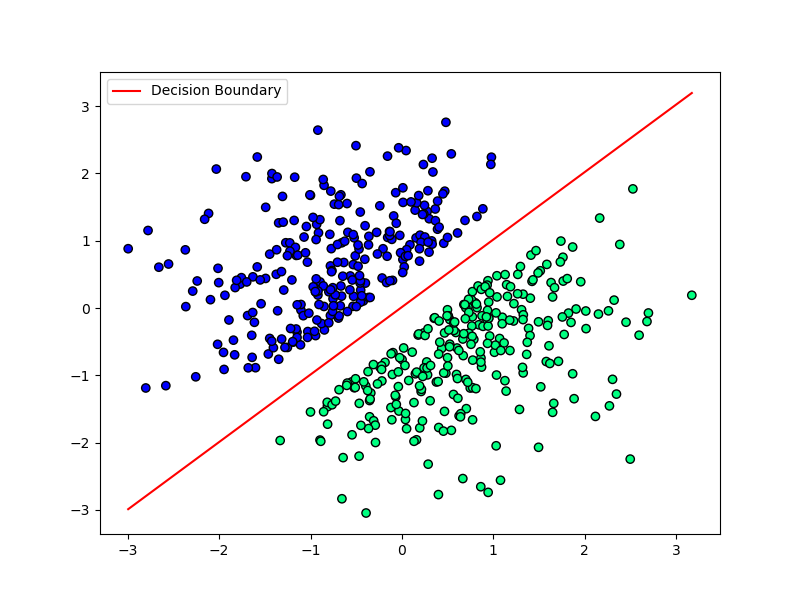

In [43]:
intercept = model.intercept_[0]
coef = model.coef_[0]

x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = -(intercept + coef[0] * x_values) / coef[1]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter', edgecolor='k')
plt.plot(x_values, y_values, label="Decision Boundary", color='red')
plt.legend()
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

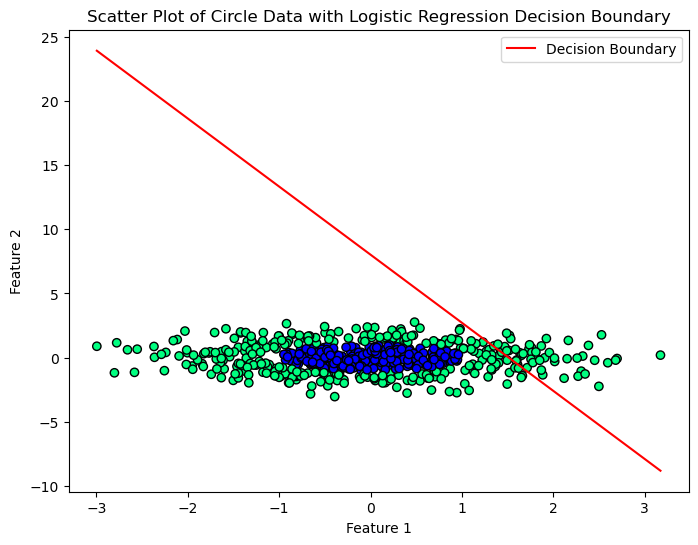

array([[-0.39944903,  0.37005589],
       [-0.38687085, -0.51029274],
       [-0.80340966, -0.68954978],
       ...,
       [-1.83002855, -0.69583512],
       [ 0.28427967,  1.74266878],
       [-0.9988488 , -0.74013679]])

In [10]:
# Generate the circle data
X_circle, Y_circle = generate_circle_data()

# Fit the logistic regression model to the circle data
model_circle = LogisticRegression().fit(X_circle, Y_circle)

# Extract coefficients and intercept
coef_circle = model_circle.coef_[0]
intercept_circle = model_circle.intercept_[0]

# Calculate the decision boundary line for circle data
# For logistic regression, this isn't a straight line in the case of circular data, but we plot it anyway for demonstration
x_values_circle = np.array([min(X_circle[:, 0]), max(X_circle[:, 0])])
y_values_circle = -(intercept_circle + coef_circle[0] * x_values_circle) / coef_circle[1]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap='winter', edgecolor='k')
plt.plot(x_values_circle, y_values_circle, label="Decision Boundary", color='red')
plt.legend()
plt.show()
t

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features by squaring them
poly = PolynomialFeatures(degree=2, include_bias=False)
X_transformed = poly.fit_transform(X_circle)

# Fit the logistic regression model to the transformed features
model_transformed = LogisticRegression().fit(X_transformed, Y_circle)

f) Plot the decision boundary using the code below.

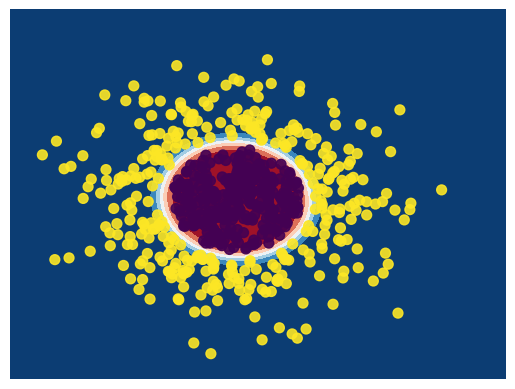

In [17]:
# Creating a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_circle[:, 0].min() - .5, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - .5, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Transforming the mesh data for prediction
meshData = np.c_[xx.ravel(), yy.ravel()]
meshData_transformed = poly.transform(meshData)

# Predicting probabilities and labels for the mesh
A = model_transformed.predict_proba(meshData_transformed)[:, 1].reshape(xx.shape)
Z = model_transformed.predict(meshData_transformed).reshape(xx.shape)

# Plotting
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plotting also the training points
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

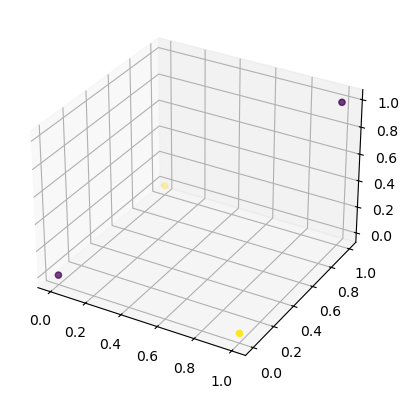

In [18]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 0] * X[:, 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

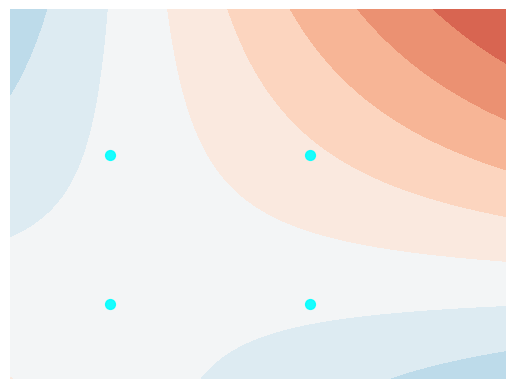

In [20]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [ ]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        # print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            # print("random state = ", i)
            # print("solver = ", solver)
            break

# print(model.coef_)
# print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / \
    model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 0] * X[:, 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

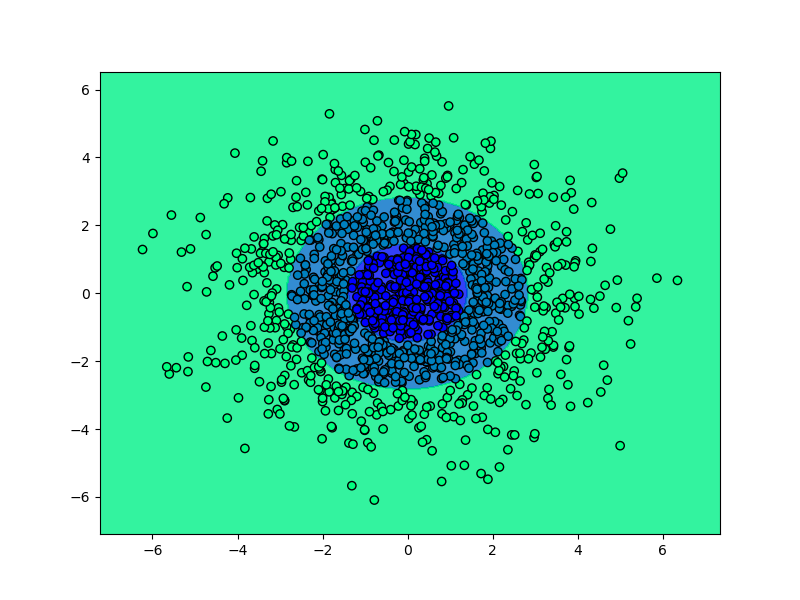

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def generate_circles_data(t):
    def label(x):
        if x[0] ** 2 + x[1] ** 2 >= 2 and x[0] ** 2 + x[1] ** 2 < 8:
            return 1
        if x[0] ** 2 + x[1] ** 2 >= 8:
            return 2
        return 0

    # create some space between the classes
    X = np.array(list(filter(lambda x: (x[0] ** 2 + x[1] ** 2 < 1.8 or x[0] ** 2 + x[1] ** 2 > 2.2) and (
            x[0] ** 2 + x[1] ** 2 < 7.8 or x[0] ** 2 + x[1] ** 2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y


# Generating data
centers = [[0, 0]]
t, _ = make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)
X_concentric, Y_concentric = generate_circles_data(t)

# Preparing the model with polynomial features and logistic regression
poly_concentric = PolynomialFeatures(degree=2)
lr_concentric = LogisticRegression(max_iter=1000)
model_concentric = make_pipeline(poly_concentric, lr_concentric)

# Fitting the model
model_concentric.fit(X_concentric, Y_concentric)

# Creating a meshgrid for prediction
x_min, x_max = X_concentric[:, 0].min() - 1, X_concentric[:, 0].max() + 1
y_min, y_max = X_concentric[:, 1].min() - 1, X_concentric[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Predicting the labels for each point in the mesh
Z_concentric = model_concentric.predict(meshData).reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_concentric, alpha=0.8, cmap='winter')
plt.scatter(X_concentric[:, 0], X_concentric[:, 1], c=Y_concentric, edgecolor='k', cmap='winter')
plt.show()